In [1]:
#importing necessacity libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#Importing the dataset
data=pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#To check not null values are present or not
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
#To get the count of not null value of both categorical and continous
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

.There are no null value in the dataset.                        

In [5]:
#To get the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#To drop Unnamed: 0 column as no need to keep
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
#To check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
#we have 2 categorical column .so, first we have to encode them using encoding techniques.   
from sklearn.preprocessing import OrdinalEncoder

In [9]:
#Encoding type column
ord_encoder=OrdinalEncoder(categories=[['conventional','organic']])
df1=ord_encoder.fit_transform(data[['type']])
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [10]:
#Encoding region column
ord_encoder=OrdinalEncoder(categories=[['Albany','Atlanta','California','HarrisburgScranton','Seattle','Spokane','RichmondNorfolk','MiamiFtLauderdale','PhoenixTucson','Detroit','Midsouth','Plains','Sacramento','DallasFtWorth','RaleighGreensboro','SanFrancisco','Columbus','NewOrleansMobile','StLouis','Boston','Philadelphia','Pittsburgh','Syracuse','NorthernNewEngland','Northeast','Indianapolis','WestTexNewMexico','Jacksonville','SouthCentral','Denver','Tampa','CincinnatiDayton','Orlando','West','NewYork','Southeast','Chicago','Roanoke','Houston','Nashville','LasVegas','Louisville','SanDiego','BuffaloRochester','GrandRapids','SouthCarolina','HartfordSpringfield','Charlotte','LosAngeles','Portland','TotalUS','Boise','BaltimoreWashington','GreatLakes']])
df2=ord_encoder.fit_transform(data[['region']])
df2

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [26.],
       [26.],
       [26.]])

In [11]:
#overriding type and region column with the dataset
data['type']=df1
data['region']=df2
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,26.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,26.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,26.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,26.0


In [13]:
data=data.drop(['Date'],axis=1)
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,26.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,26.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,26.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,26.0


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

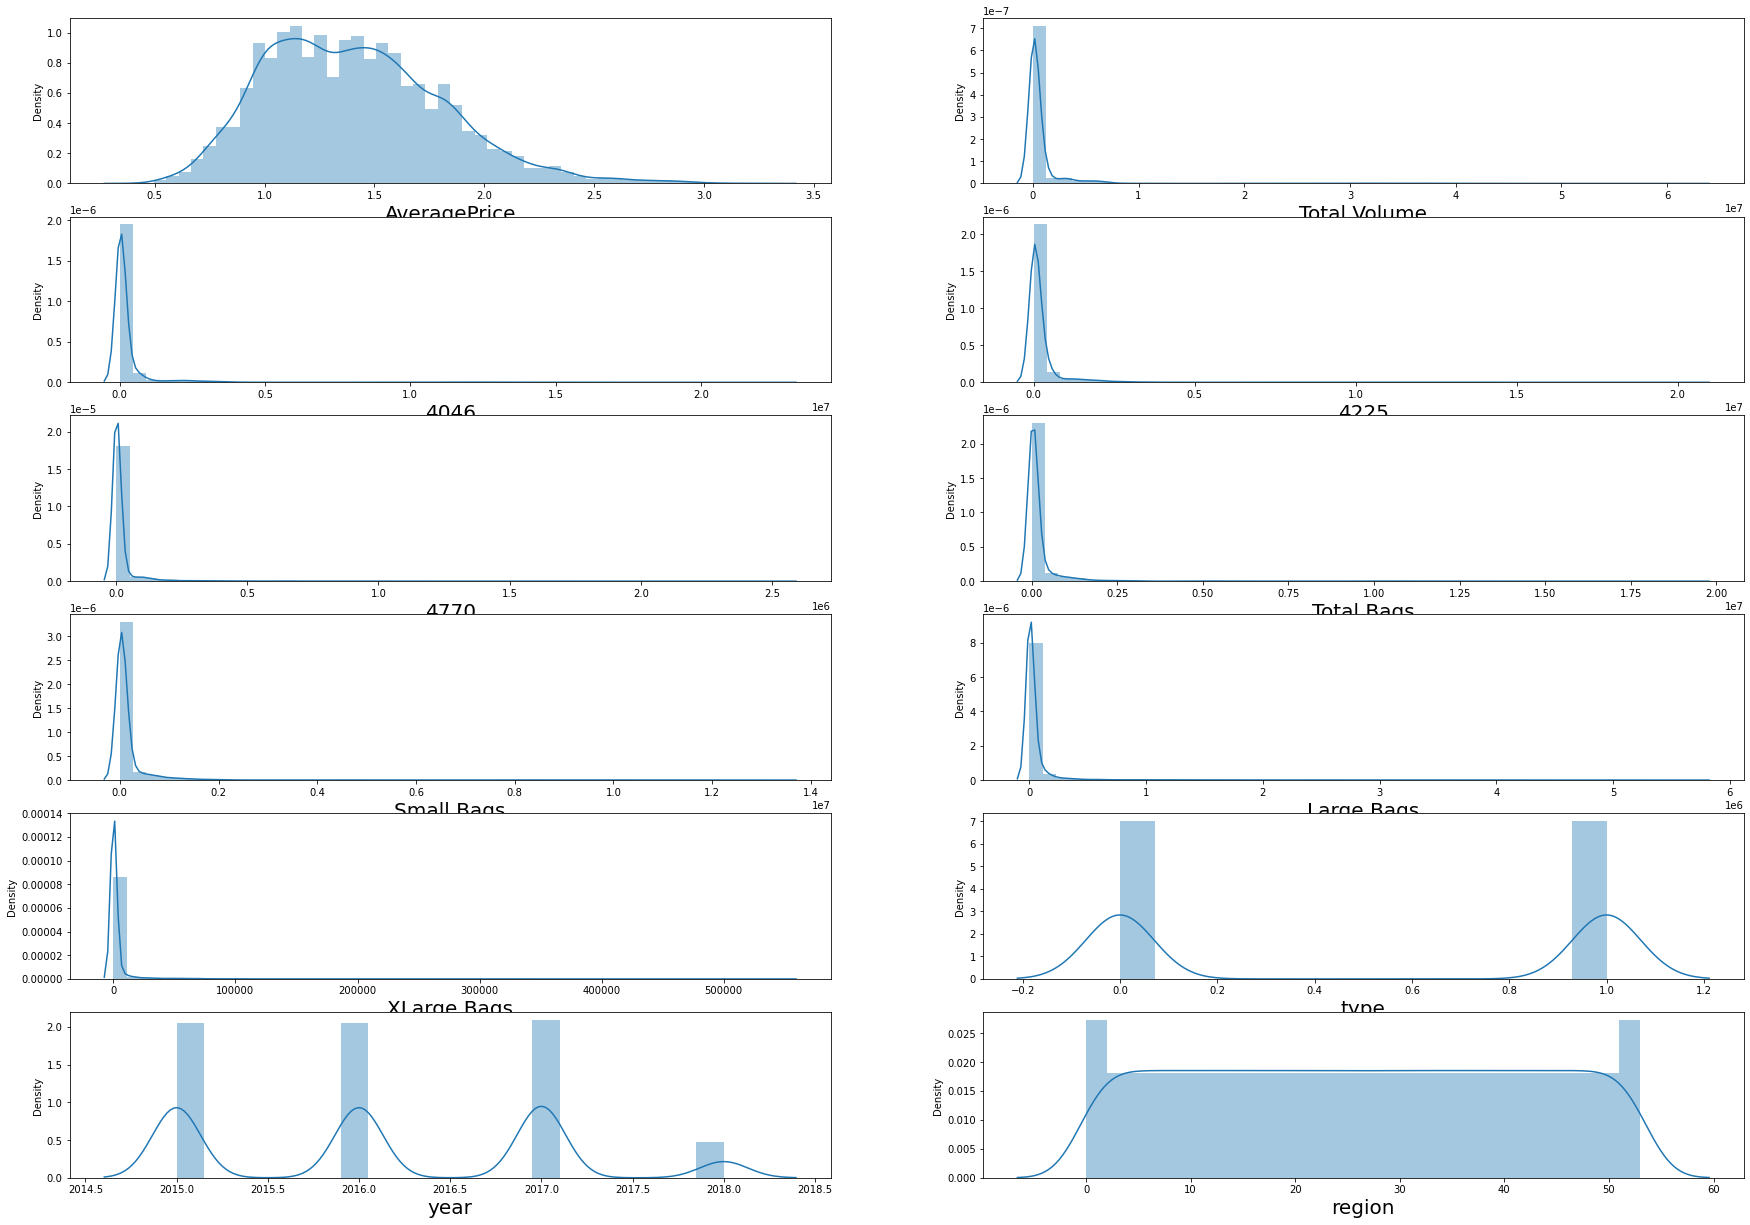

In [15]:
#let's see how data is distributed for every column
plt.figure(figsize=(30,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

.There are little skewness present in the data set. so, to remove them by using z score.                  

In [16]:
from scipy import stats
z=np.abs(stats.zscore(data))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 0.99983562 1.22128204 1.70013304]
 [0.13901962 0.23042664 0.23110251 ... 0.99983562 1.22128204 1.70013304]
 [1.18206895 0.21208462 0.23100731 ... 0.99983562 1.22128204 1.70013304]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.00016441 1.97050371 0.03208316]
 [1.30138182 0.24162464 0.2304279  ... 1.00016441 1.97050371 0.03208316]
 [0.53151208 0.24125273 0.22934712 ... 1.00016441 1.97050371 0.03208316]]


In [17]:
print('Row numbers   \n',np.where(z>3)[0])
print('Column numbers     \n',np.where(z>3)[1])

Row numbers   
 [  346   359   780 ... 17304 17402 17428]
Column numbers     
 [2 2 8 ... 0 0 0]


In [18]:
index=(np.where(z>3)[0])

In [19]:
data=data.drop(data.index[index])
data.shape

(17651, 12)

In [20]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


.Outliers removed   . now we can move further.                

In [22]:
#spliting the dataset into features and label
x=data.drop(columns=['AveragePrice'])
y=data['AveragePrice']

In [24]:
#Data scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [25]:
#spliting the dataset in train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=330)

In [27]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
regression.predict(x_test)

array([1.23253888, 1.14826317, 1.6361338 , ..., 1.63359633, 1.59595928,
       1.15149544])

In [29]:
#saving model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))